#Data features
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

# impoert libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()


id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Histogram plots

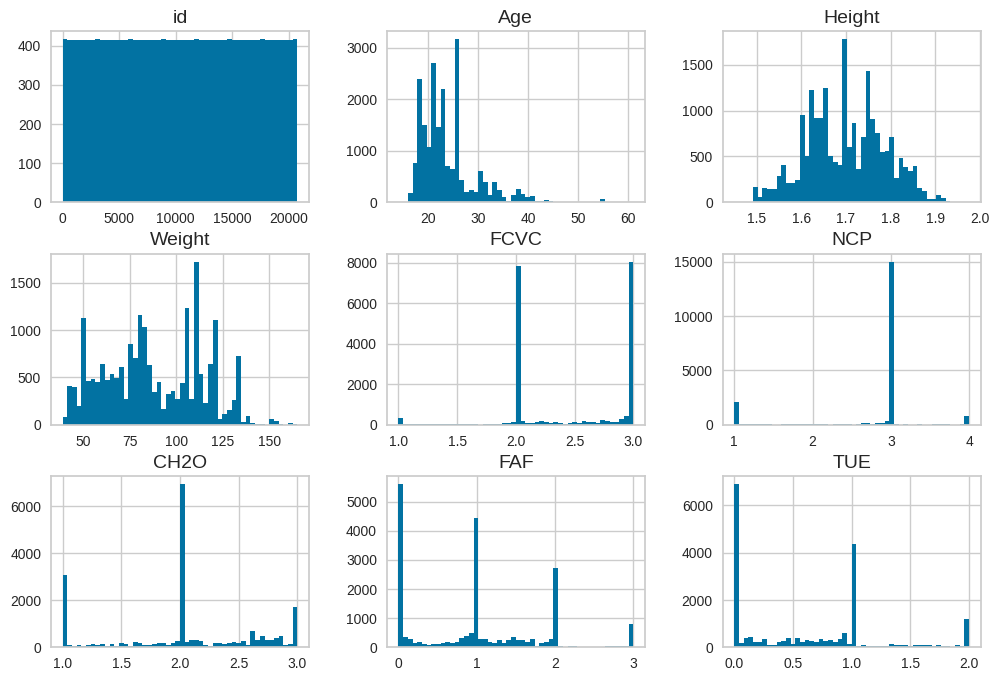

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
X = data.drop(['NObeyesdad'], axis=1)
y = data['NObeyesdad']

In [ ]:
#data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])  # Adjust bins as necessary
#strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, stratify=data["AgeGroup"], random_state=42)


In [ ]:
#data= strat_train_set.copy()

# scatter plot

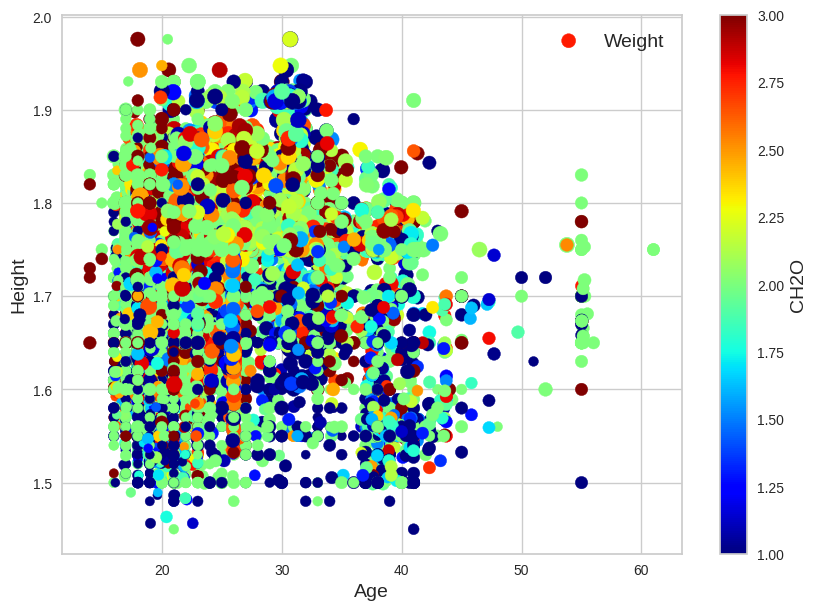

In [ ]:
data.plot(kind="scatter", x="Age", y="Height", grid=True,
             s=data["Weight"] , label="Weight",
             c="CH2O", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

In [ ]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# find relatonship

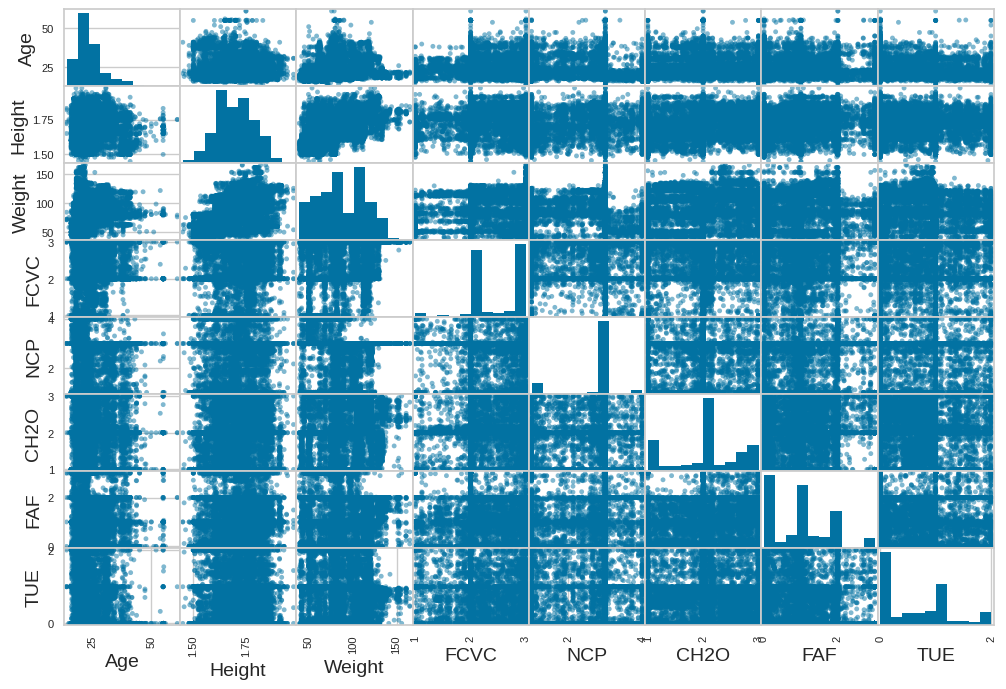

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

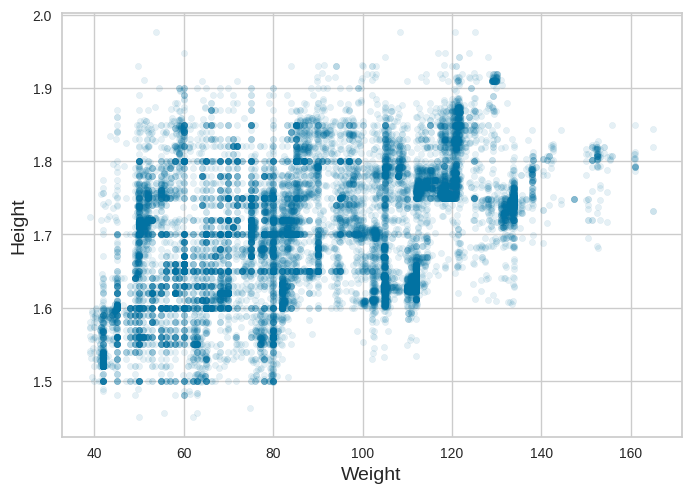

In [ ]:
data.plot(kind="scatter", x="Weight", y="Height",
             alpha=0.1, grid=True)
plt.show()

# Add features

In [ ]:
data['BMI']= data['Weight']/(data['Height']**2)
data
#please change the order of BMI

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad        BMI  
0      Public_Transportation  Overweight_Level_II  28.259565  
1                 Automobile        Normal_Weight  23.422091  
2      Public_Transportation  Insufficient_Weight  17.126706  
3      Public_Transportation     Obesity_Type_III  44.855798  
4      Public_Transportation  Overweight_Level_II  25.599151  
...                      ...                  ...        ...  
20753  Public_Transportation      Obesity_Type_II  36.587084  
20754  Public_Transportation  Insufficient_Weight  17.099278  
20755  Public_Transportation      Obesity_Type_II  31.889841  
20756             Automobile  Overweight_Level_II  28.899693  
20757  Public_Transportation      Obesity_Type_II  35.800157  

[20758 rows x 19 columns]

In [ ]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["Age"].sort_values(ascending=False)

Age       1.000000
BMI       0.320842
Weight    0.283381
FCVC      0.034414
id        0.007634
Height   -0.011713
CH2O     -0.016325
NCP      -0.048479
FAF      -0.192259
TUE      -0.296154
Name: Age, dtype: float64

#Convert categorical data to numerical

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming 'data' is your existing DataFrame
# Create a dictionary to map column names to encoding operations
encoders = {
    'SMOKE': LabelEncoder(),
    'family_history_with_overweight': LabelEncoder(),
    'CAEC': LabelEncoder(),
    'FAVC': LabelEncoder(),
    'SCC': LabelEncoder(),
    'CALC': LabelEncoder(),
    'MTRANS': LabelEncoder(),
    'NObeyesdad': LabelEncoder(),
    'Gender': OneHotEncoder(sparse_output=False)  # Correct parameter for OneHotEncoder
}

# Encode categorical columns efficiently
for col, encoder in encoders.items():
    if isinstance(encoder, LabelEncoder):
        # Overwrite the original column with the encoded values
        data[col] = encoder.fit_transform(data[col])
    elif isinstance(encoder, OneHotEncoder):
        # Perform OneHot encoding and replace the original column with new one-hot encoded columns
        encoded_values = encoder.fit_transform(data[[col]])
        # Drop the original column as new one-hot encoded columns will be added
        data.drop(col, axis=1, inplace=True)
        # Retrieve column names for one-hot encoded features, typically following the format '<feature>_<category>'
        categories = encoder.get_feature_names_out([col])
        # Add each one-hot encoded column to the DataFrame
        for i, category in enumerate(categories):
            data[category] = encoded_values[:, i]

# Print the DataFrame with encoded columns
data.head()  # Display the first few rows to check the results


id        Age    Height      Weight  family_history_with_overweight  FAVC  \
0   0  24.443011  1.699998   81.669950                               1     1   
1   1  18.000000  1.560000   57.000000                               1     1   
2   2  18.000000  1.711460   50.165754                               1     1   
3   3  20.952737  1.710730  131.274851                               1     1   
4   4  31.641081  1.914186   93.798055                               1     1   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0  2.000000  2.983297     2      0  2.763573    0  0.000000  0.976473     1   
1  2.000000  3.000000     1      0  2.000000    0  1.000000  1.000000     2   
2  1.880534  1.411685     2      0  1.910378    0  0.866045  1.673584     2   
3  3.000000  3.000000     2      0  1.674061    0  1.467863  0.780199     1   
4  2.679664  1.971472     2      0  1.979848    0  1.967973  0.931721     1   

   MTRANS  NObeyesdad        BMI  Gender_Female  Gender_Male  
0       3           6  28.259565            0.0          1.0  
1       0           1  23.422091            1.0          0.0  
2       3           0  17.126706            1.0          0.0  
3       3           4  44.855798            1.0          0.0  
4       3           6  25.599151            0.0          1.0

#Assess heavy tail of age

Skewness of the dataset: 1.58613708250681
Kurtosis of the dataset (Fisher's definition): 3.6994174114234086
Kurtosis of the dataset (excess kurtosis): 6.699417411423409


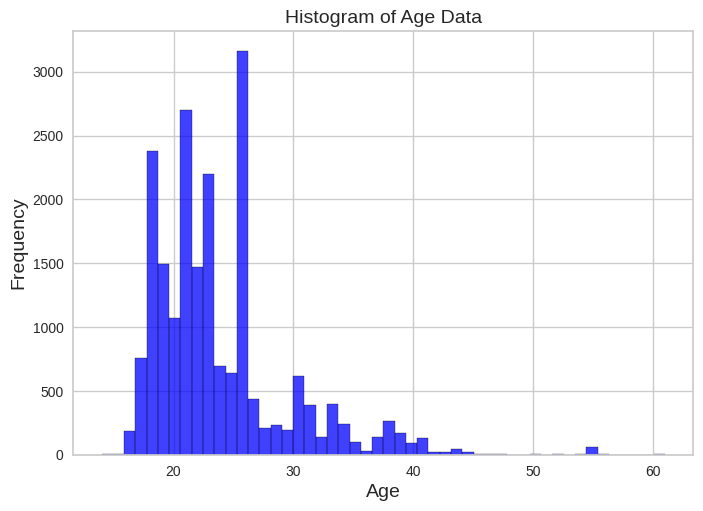

In [ ]:
#assess heavy tail of age

from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the 'Age' column
data_skewness = skew(data['Age'])
data_kurtosis = kurtosis(data['Age'])

# Print the calculated skewness and kurtosis
print("Skewness of the dataset:", data_skewness)
print("Kurtosis of the dataset (Fisher's definition):", data_kurtosis)
print("Kurtosis of the dataset (excess kurtosis):", data_kurtosis + 3)  # To compare with a normal distribution

# Plotting the 'Age' data
plt.hist(data['Age'], bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Age Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Analysis of the 'Age' Column
Descriptive Statistics:

The 'Age' column has values ranging from 14 to 61 years.
The mean age is approximately 23.84 years.
The standard deviation is around 5.69 years, indicating the spread of age data around the mean.
Skewness and Kurtosis:

The skewness value is 1.59. A skewness greater than 1 indicates a highly skewed distribution, with a tail that stretches towards older ages.
The kurtosis value is 3.70. Kurtosis is a measure of the "tailedness" of the distribution; a kurtosis greater than 3 (excess kurtosis positive) suggests a heavy tail. This is significant as it implies that the distribution has fatter tails and a sharper peak than the normal distribution.
Histogram:

The histogram visually supports the calculation, showing a right-skewed distribution with a tail extending towards older ages.

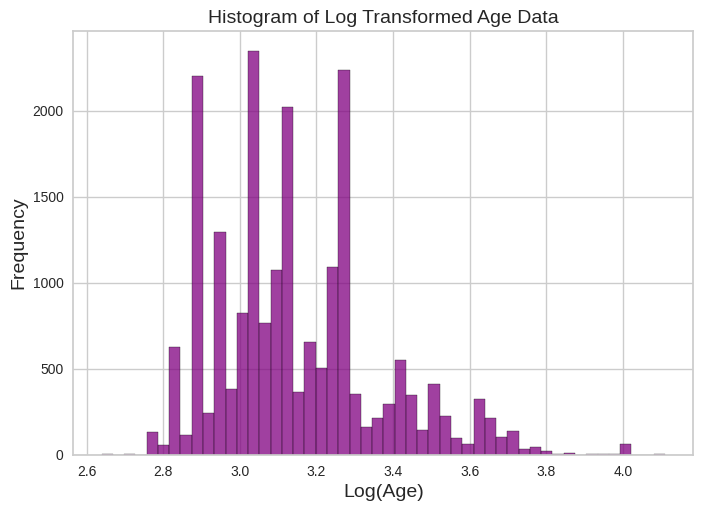

(0.8333828536526445, 0.6646286739174534)

In [ ]:
import numpy as np

# Adding a small constant because log transformation cannot handle zero or negative values
# Since Age is likely to have all positive values, we directly apply log
data['Log_Age'] = np.log(data['Age'])

# Calculate skewness and kurtosis for the transformed 'Age'
log_age_skewness = skew(data['Log_Age'])
log_age_kurtosis = kurtosis(data['Log_Age'])

# Plotting the histogram of the log-transformed 'Age' data
plt.hist(data['Log_Age'], bins=50, alpha=0.75, color='purple', edgecolor='black')
plt.title('Histogram of Log Transformed Age Data')
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.show()

log_age_skewness, log_age_kurtosis


In [ ]:
data.columns

Index(['id', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Gender_Female', 'Gender_Male',
       'Log_Age'],
      dtype='object')

In [ ]:
data2=data[[ 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Gender_Female', 'Gender_Male',
       'Log_Age']]
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(data2)

In [ ]:
pip install pycaret

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 409, in resolve
    unsatisfied_names = [
  File "/usr/local/lib/python3

In [ ]:
from pycaret.classification import *

In [ ]:
X = data2.drop(['NObeyesdad'], axis=1)
y = data2['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
setup_data = setup(data=X_train, target=y_train, session_id=123)

# Compare different models using the specified cross-validation strategy
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
model=create_model('gbc',fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(model, fold=5)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:

# Evaluate the model using the specified cross-validation strategy
evaluate_model(tuned_model)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Finalize model for predictions
final_model = finalize_model(tuned_model)

In [ ]:
y_pred =final_model.predict(X_val)

In [ ]:
accuracy_score(y_val, y_pred)

0.9022157996146436